In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

/tmp/ipykernel_84526/2216997426.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
files = os.listdir("./pointsFromSVG")
files.sort()
files = files[26:] + files[:26]
files

['a',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'h',
 'i',
 'j',
 'k',
 'l',
 'm',
 'n',
 'o',
 'p',
 'q',
 'r',
 's',
 't',
 'u',
 'v',
 'w',
 'x',
 'y',
 'z',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z']

In [3]:
def np_from_file(filename):
    file_cont = ""
    with open("./pointsFromSVG/" + filename) as rf:
        file_cont = rf.read().strip()

    str_points = [pair.split(",") for pair in file_cont.split("\n")][:-1]
    points = []
    for point in str_points:
        points.append([float(point[0]), float(point[1])])

    return np.array(points)

In [4]:
def zeroed(np_arr):
    arr = np_arr.copy()
    arr_x = arr[:, 0]
    arr_y = arr[:, 1]

    arr_x = arr_x - arr_x.min()
    arr_y = arr_y - arr_y.min()

    points = np.array([arr_x, arr_y]).T

    return points

In [5]:
def get_scale(letter_arr, unit_x, unit_y):
    x_arr = letter_arr[:, 0]
    y_arr = letter_arr[:, 1]

    scale_x = (x_arr.max() - x_arr.min()) / unit_x
    scale_y = (y_arr.max() - y_arr.min()) / unit_y

    return (scale_x, scale_y)

In [6]:
all_letters = [zeroed(np_from_file(file)) for file in files]

ax_arr = all_letters[0][:, 0]
ay_arr = all_letters[0][:, 1]
unit_x = ax_arr.max() - ax_arr.min()
unit_y = ay_arr.max() - ay_arr.min()

letter_scales = [
    get_scale(letter_points, unit_x, unit_y) for letter_points in all_letters
]

In [7]:
%matplotlib widget

from typing import Any
import ipywidgets as widgets

class Labeler:
    def __init__(self, letter_points, letter_scales, out_arr):
        self.output = widgets.Output()
        self.colorMap = ['green', 'r', 'orange']
        self.letters = letter_points
        self.letter_scales = letter_scales
        self.letter_ind = 0
        self.figure = None
        self.stroke_num = 0
        self.letter_strokes = []
        self.current_stroke = []
        self.out_arr = out_arr

        self.next_stroke_button = widgets.Button(description="next stroke")
        self.next_stroke_button.on_click(self.next_stroke)
        self.next_letter_button = widgets.Button(description="next letter")
        self.next_letter_button.on_click(self.next_letter)
        self.exit_button = widgets.Button(description="exit")
        self.exit_button.on_click(self.exit)

    def __call__(self):
        self.label_letter()

    def next_stroke(self, event):
        self.stroke_num += 1
        self.letter_strokes.append(self.current_stroke)
        self.current_stroke = []
        self.figure.canvas.mpl_connect('button_press_event', self.click_img)

    def click_img(self, event):
        point = (event.xdata, event.ydata)
        print('pressed:', point)
        plt.scatter(event.xdata, event.ydata, c=self.colorMap[self.stroke_num % 3])
        print()
        self.current_stroke.append(point)

    def label_letter(self):
        self.figure = plt.figure(figsize=(8.5 * self.letter_scales[self.letter_ind][0], 8.5 * self.letter_scales[self.letter_ind][1]))
        self.figure.canvas.mpl_connect('button_press_event', self.click_img)
        plt.scatter(self.letters[self.letter_ind][:, 0], -1 * self.letters[self.letter_ind][:, 1], picker=True)
        plt.show()
        display(self.next_stroke_button)
        display(self.next_letter_button)
        display(self.exit_button)

    def exit(self, event):
        self.letter_ind = len(self.letters)
        self.next_letter(None)
    
    def next_letter(self, event):
        self.next_stroke(None)
        self.letter_ind += 1
        plt.cla()
        plt.clf()
        plt.close()

        self.out_arr.append([stroke[:] for stroke in self.letter_strokes]) # deepcopy
        
        if self.letter_ind >= len(self.letters):
            print('finished')
        else:
            self.letter_strokes = []
            self.stroke_num = 0
            self.label_letter()


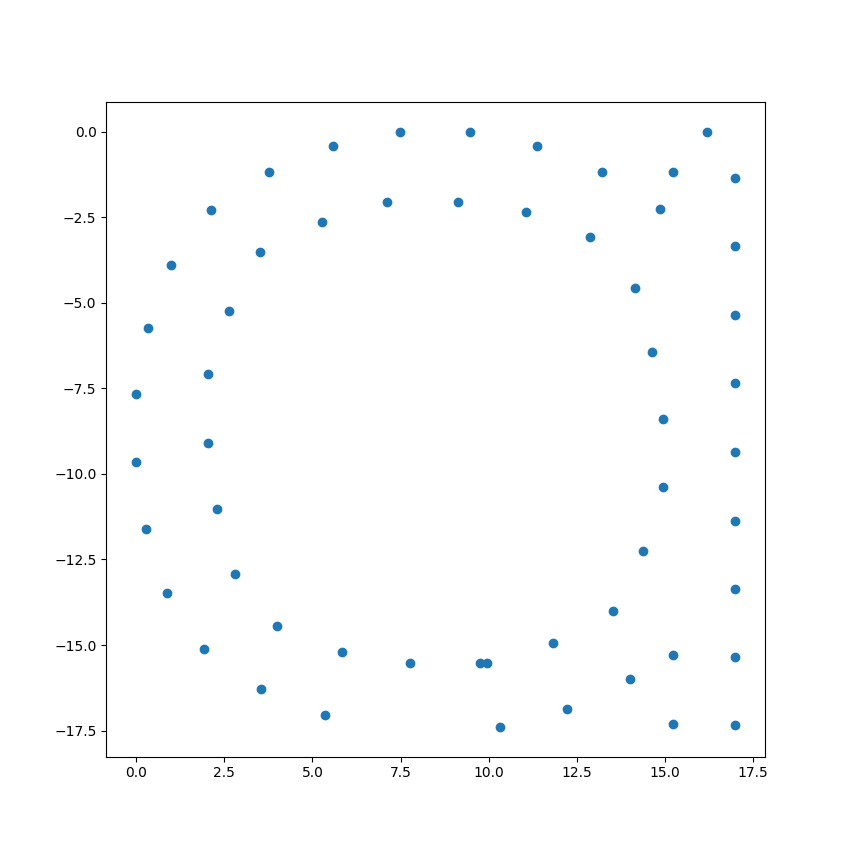

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

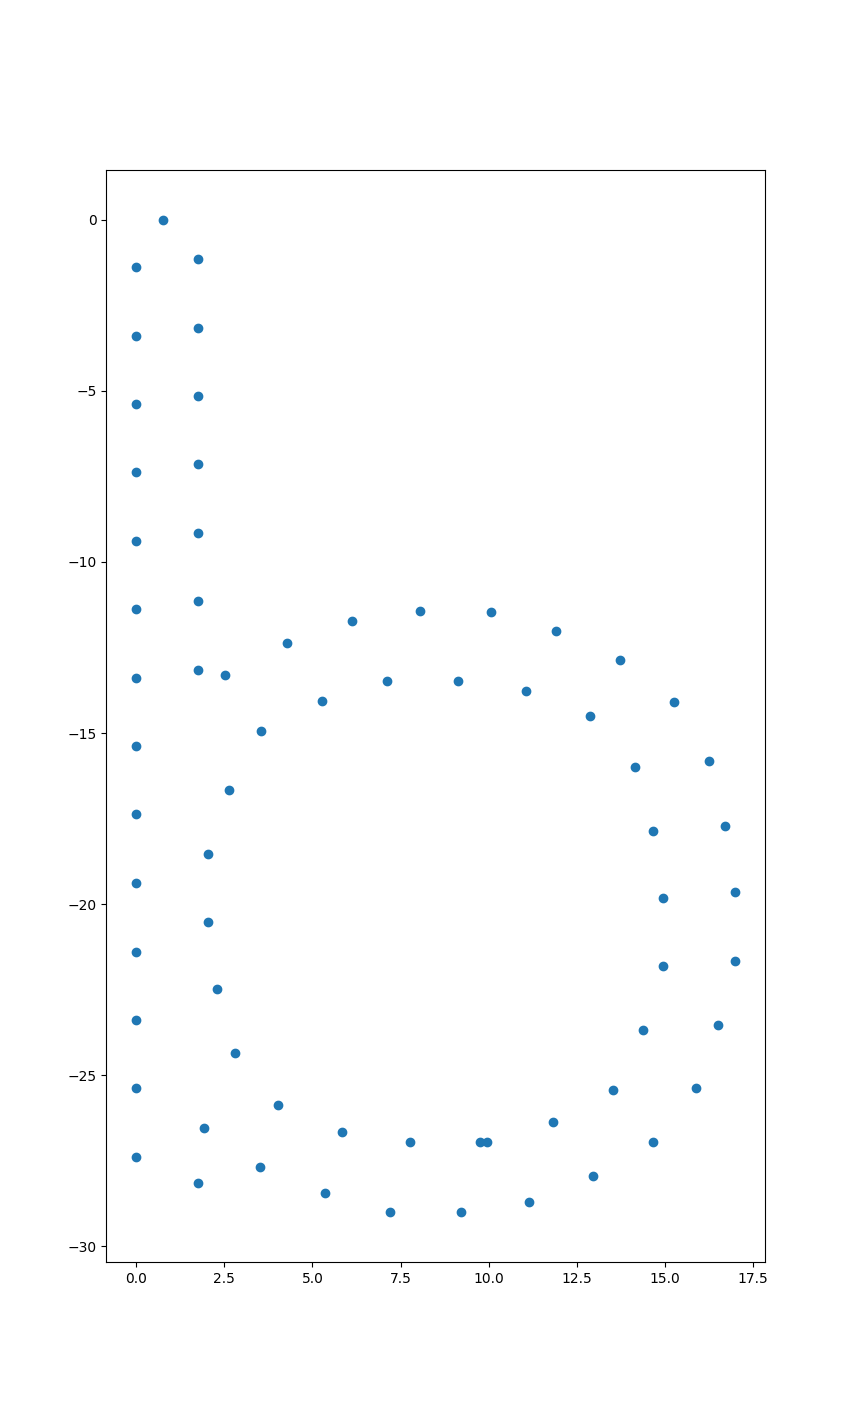

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

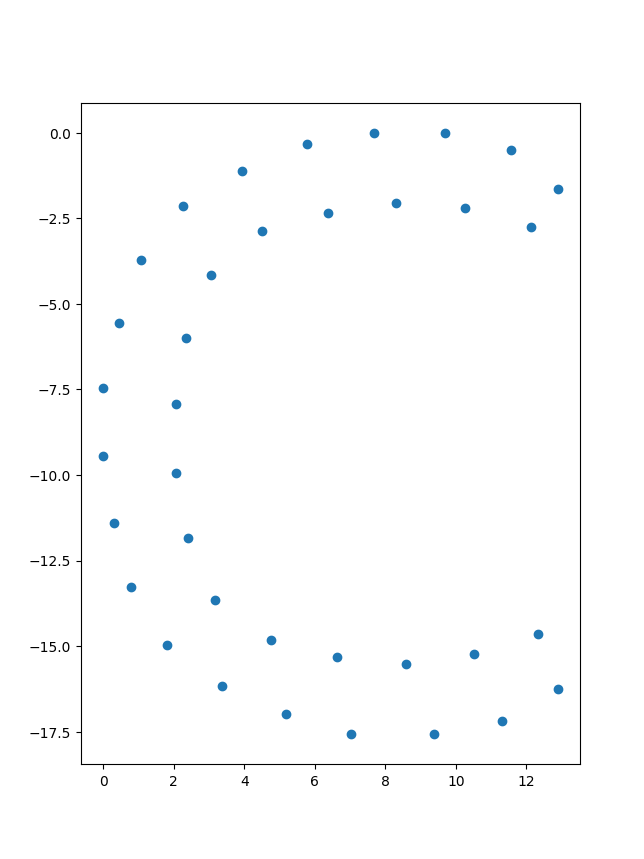

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

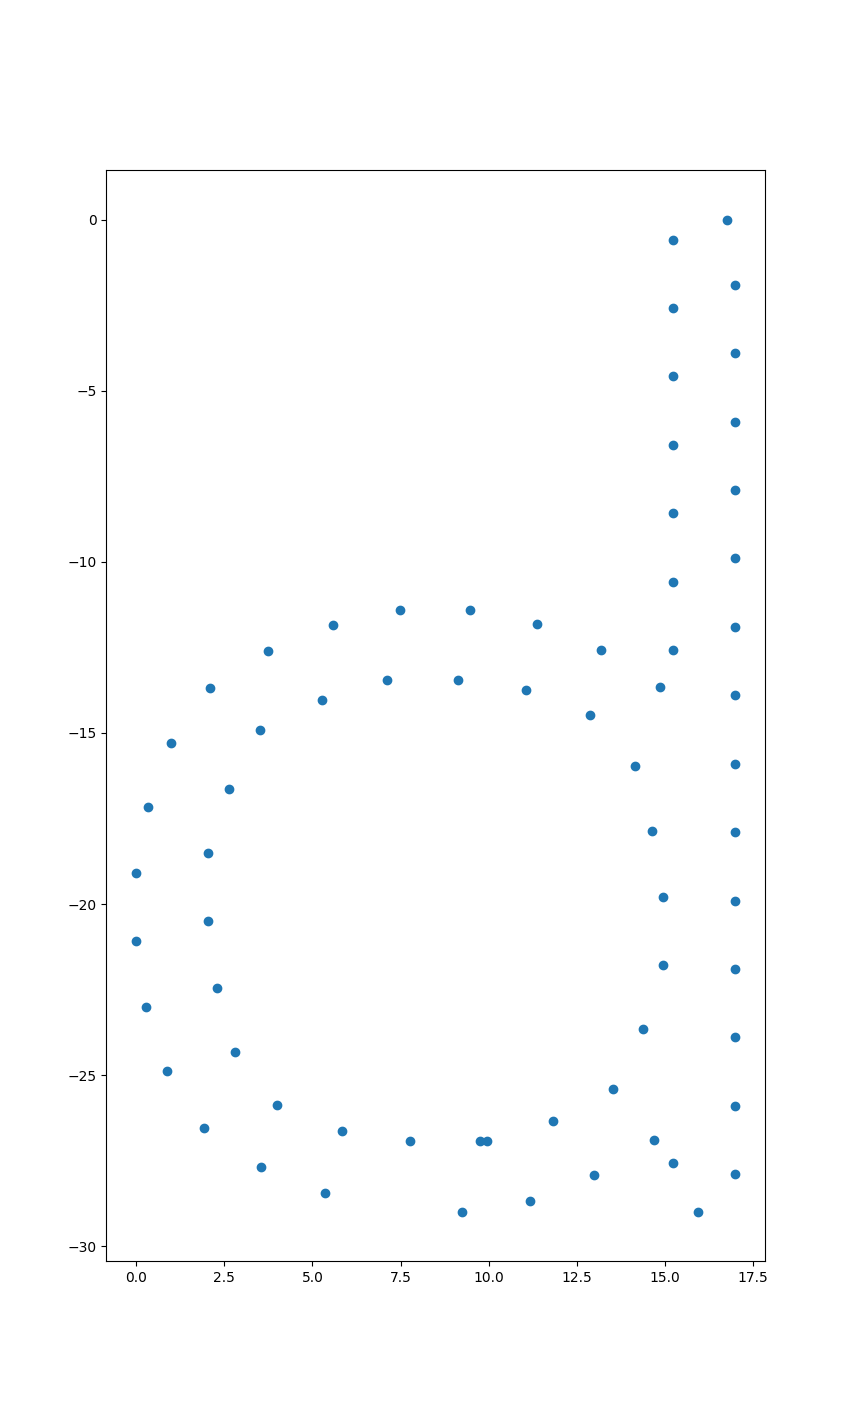

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

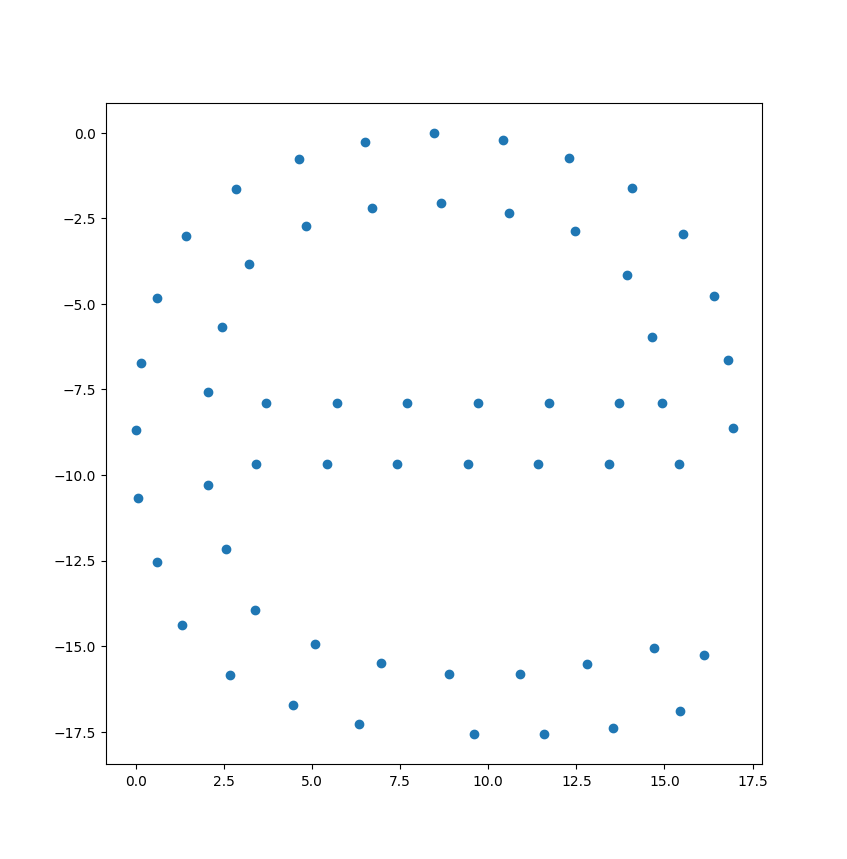

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

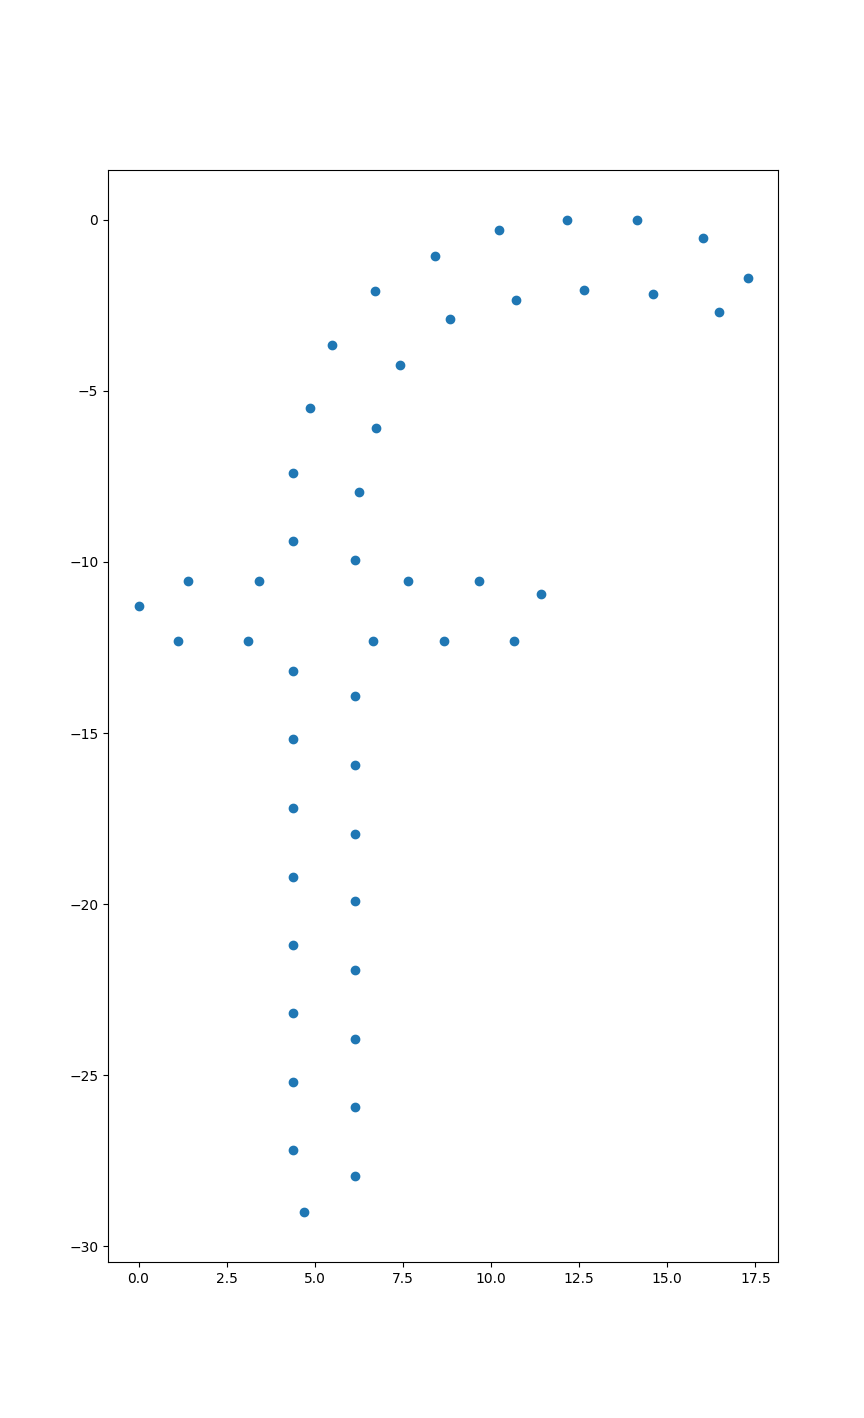

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

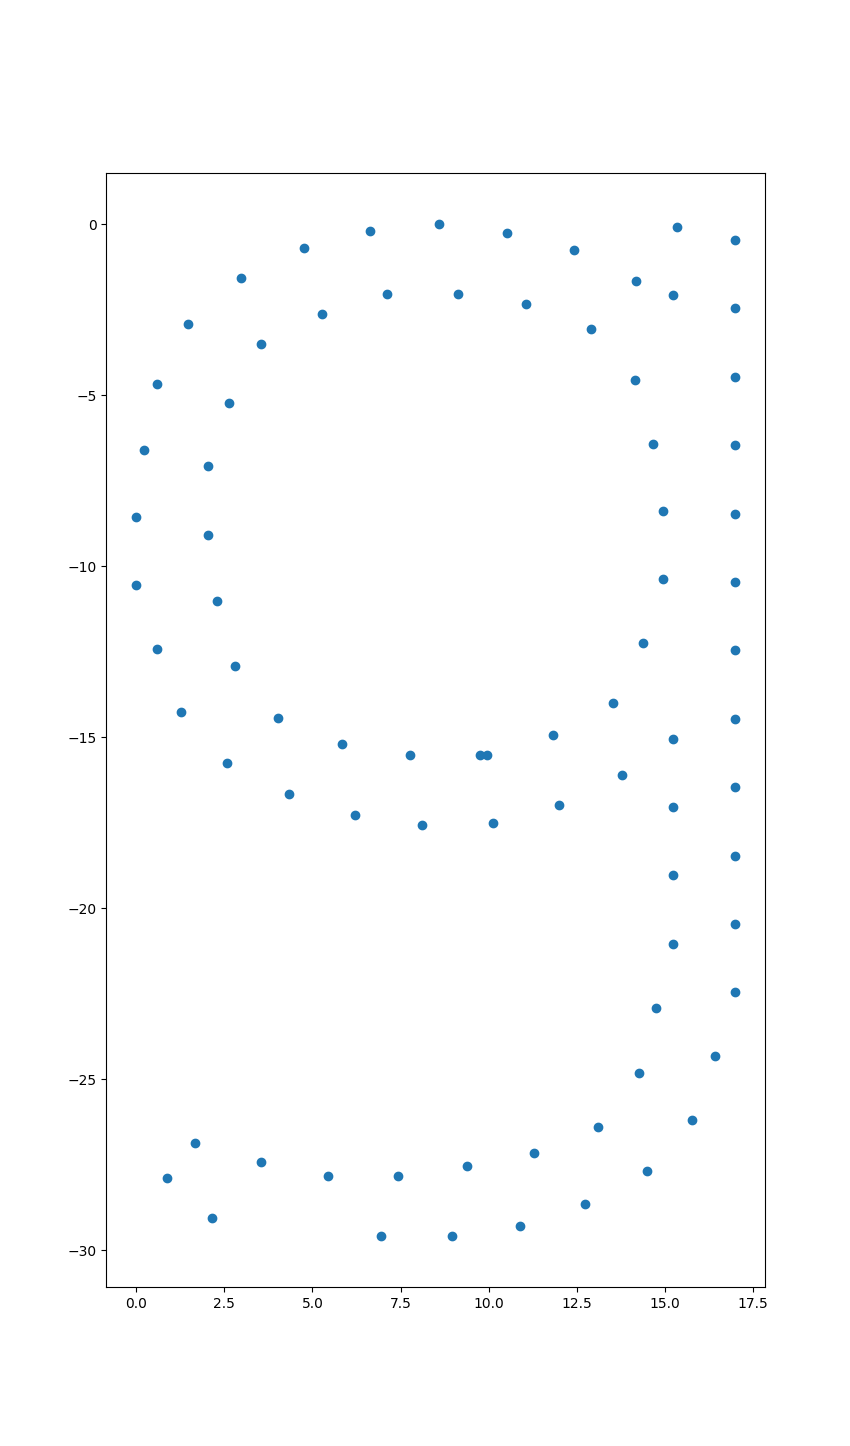

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

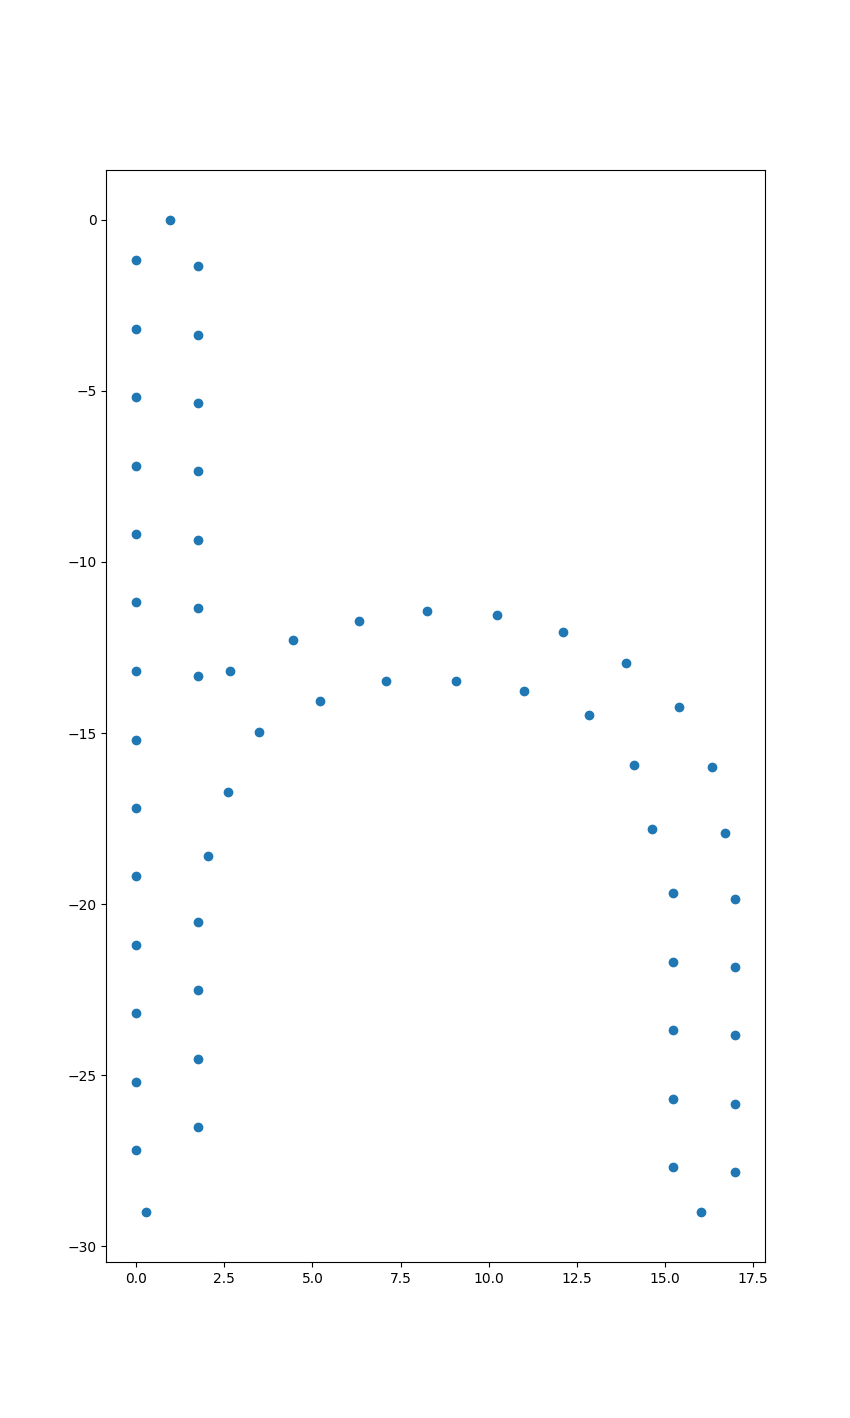

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

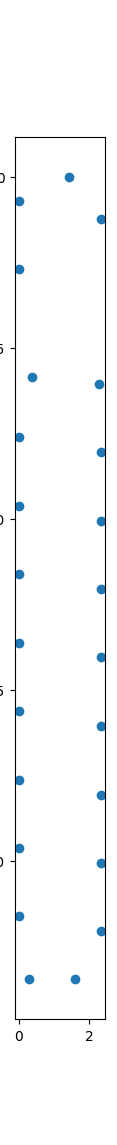

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

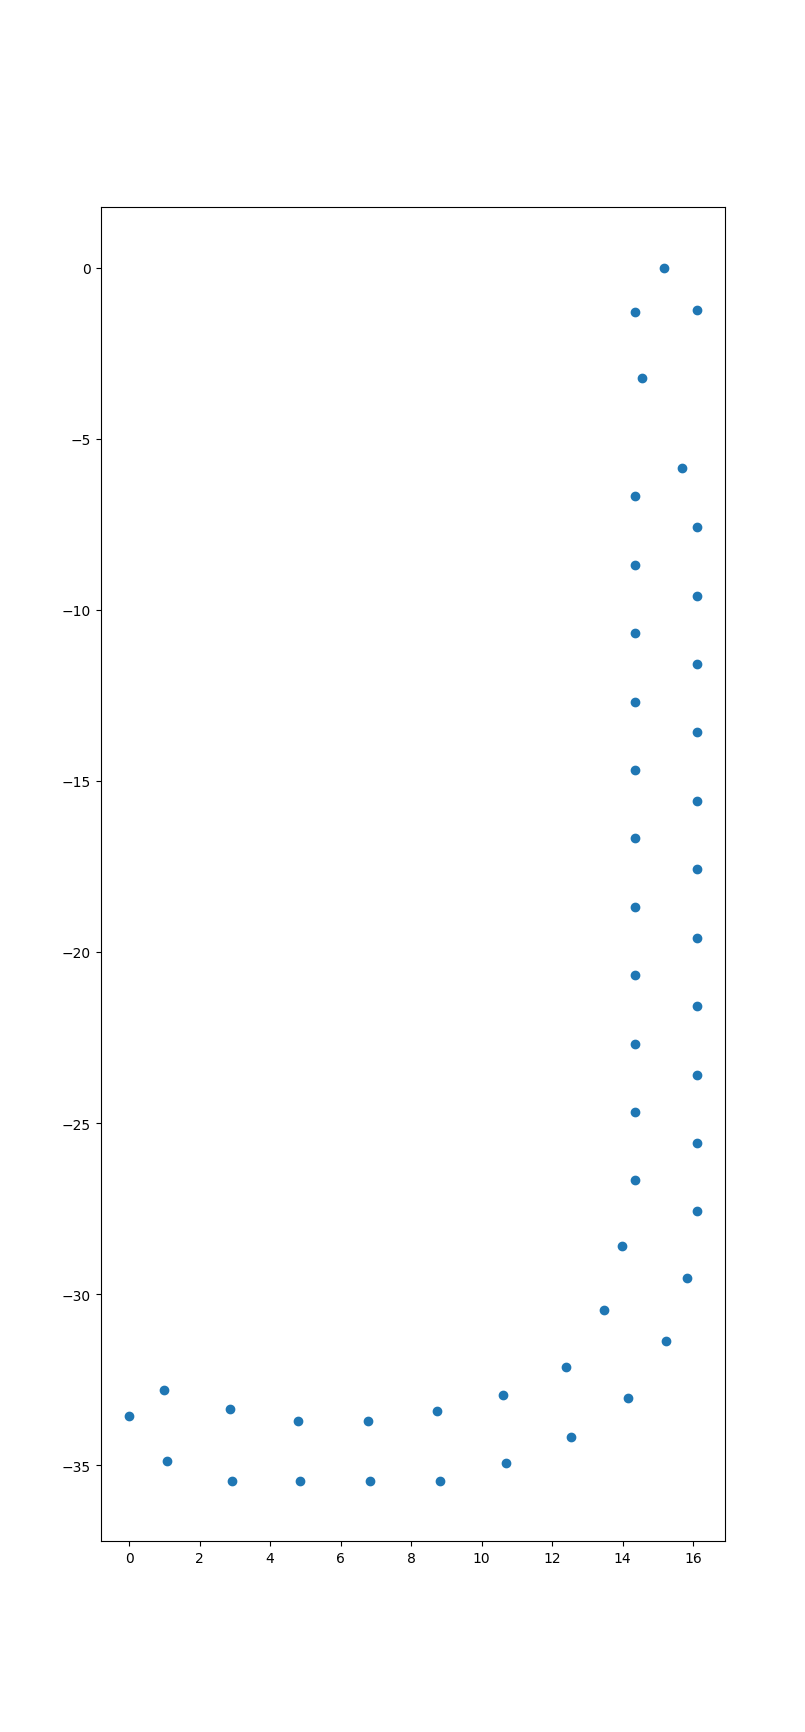

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

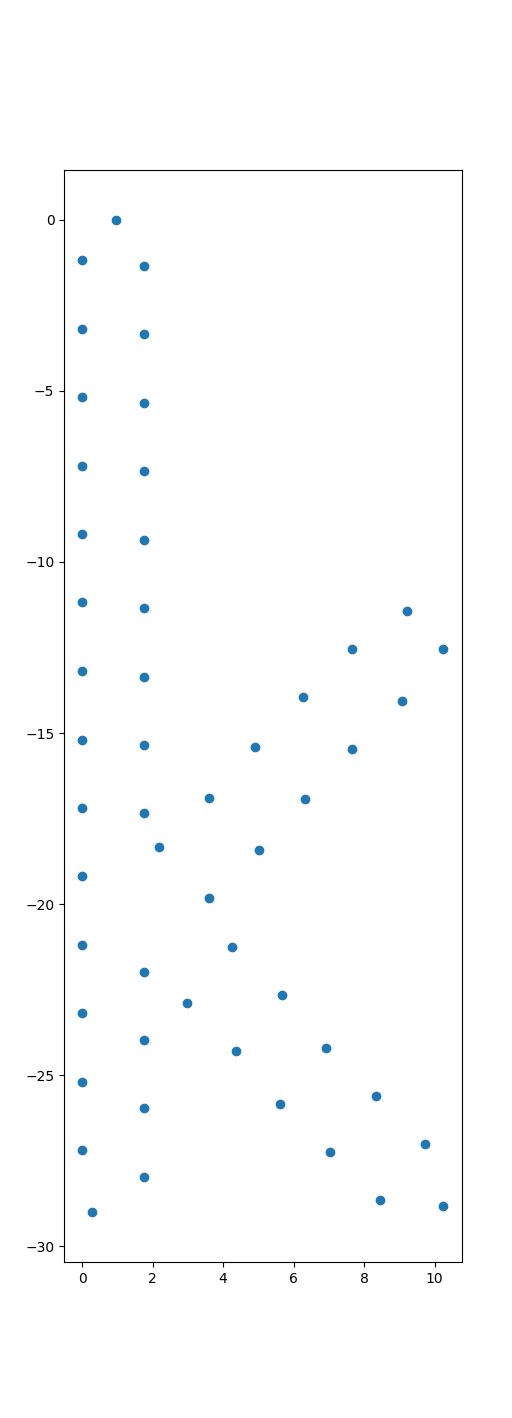

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

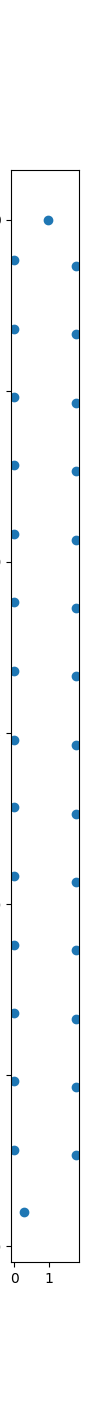

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

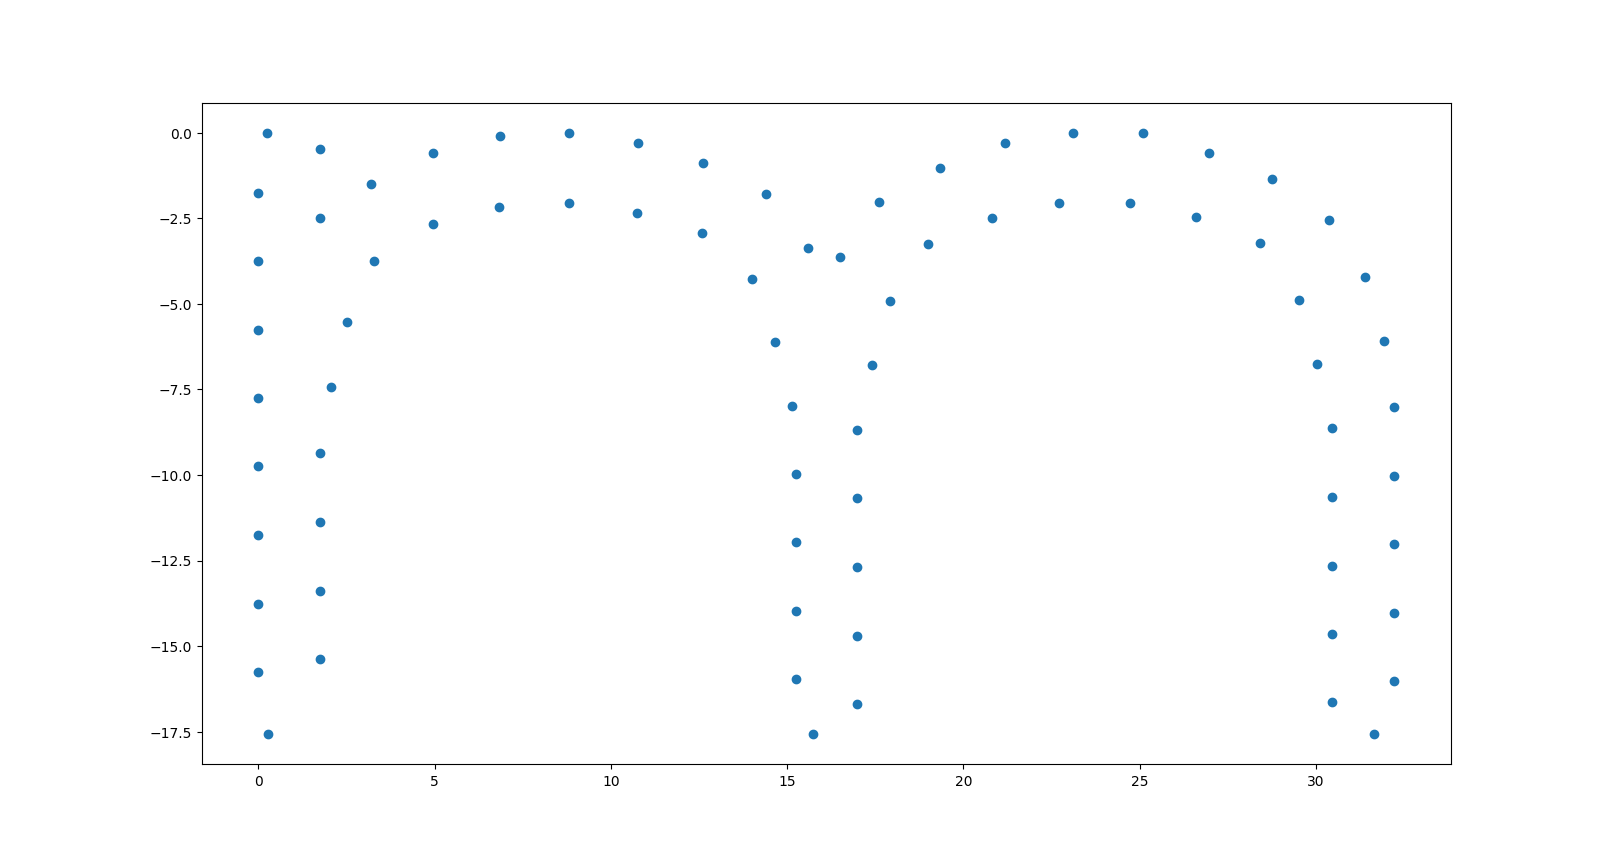

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

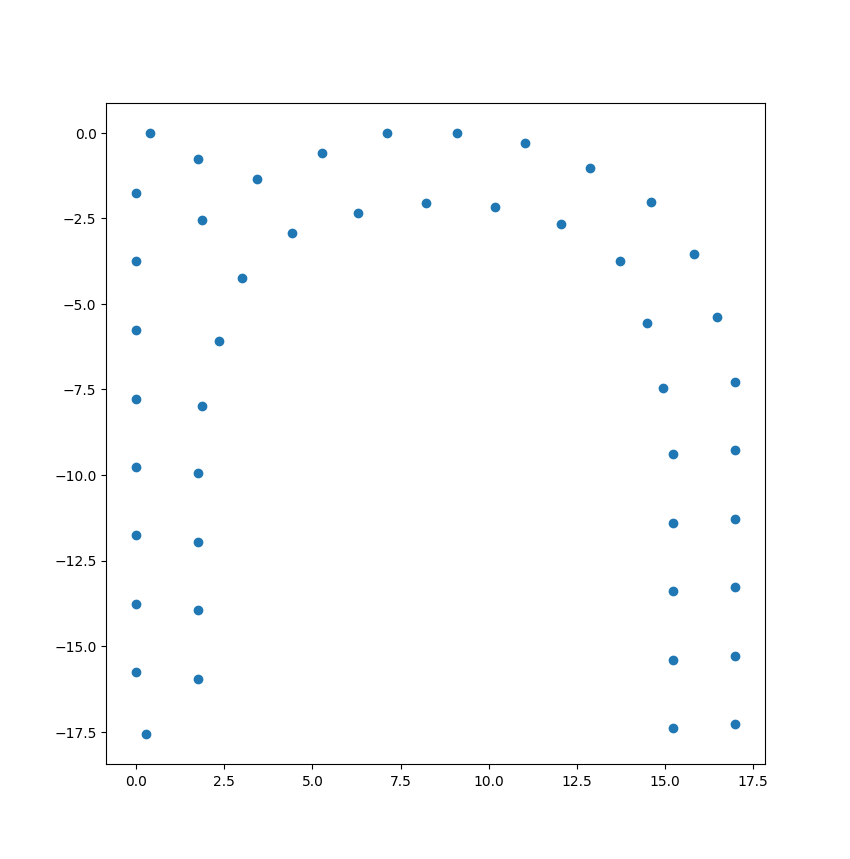

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

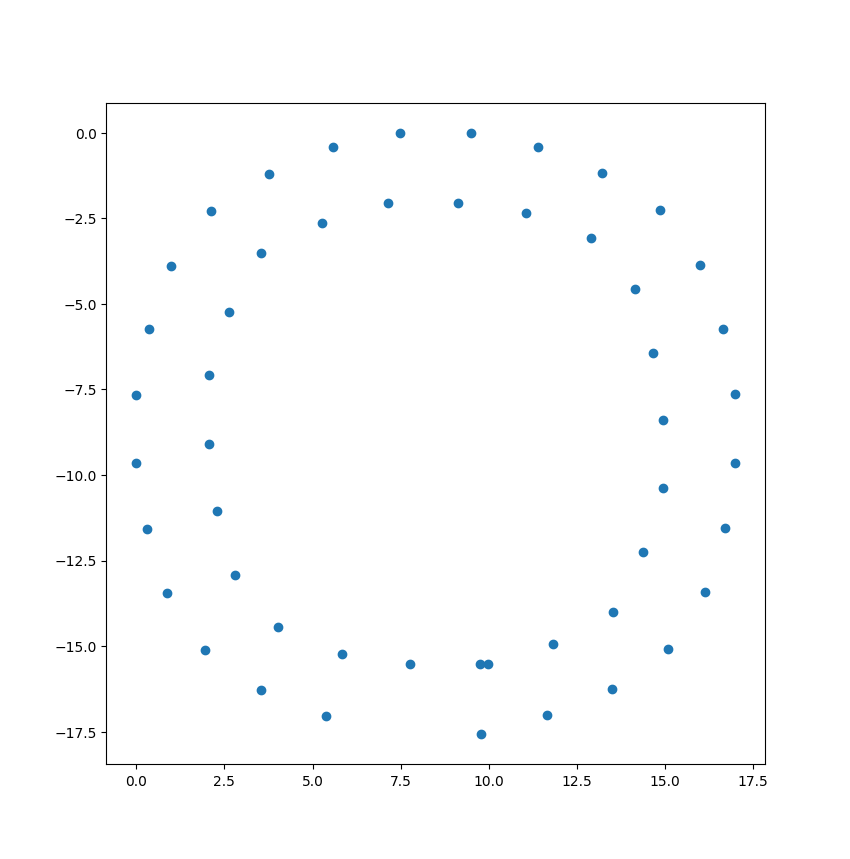

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

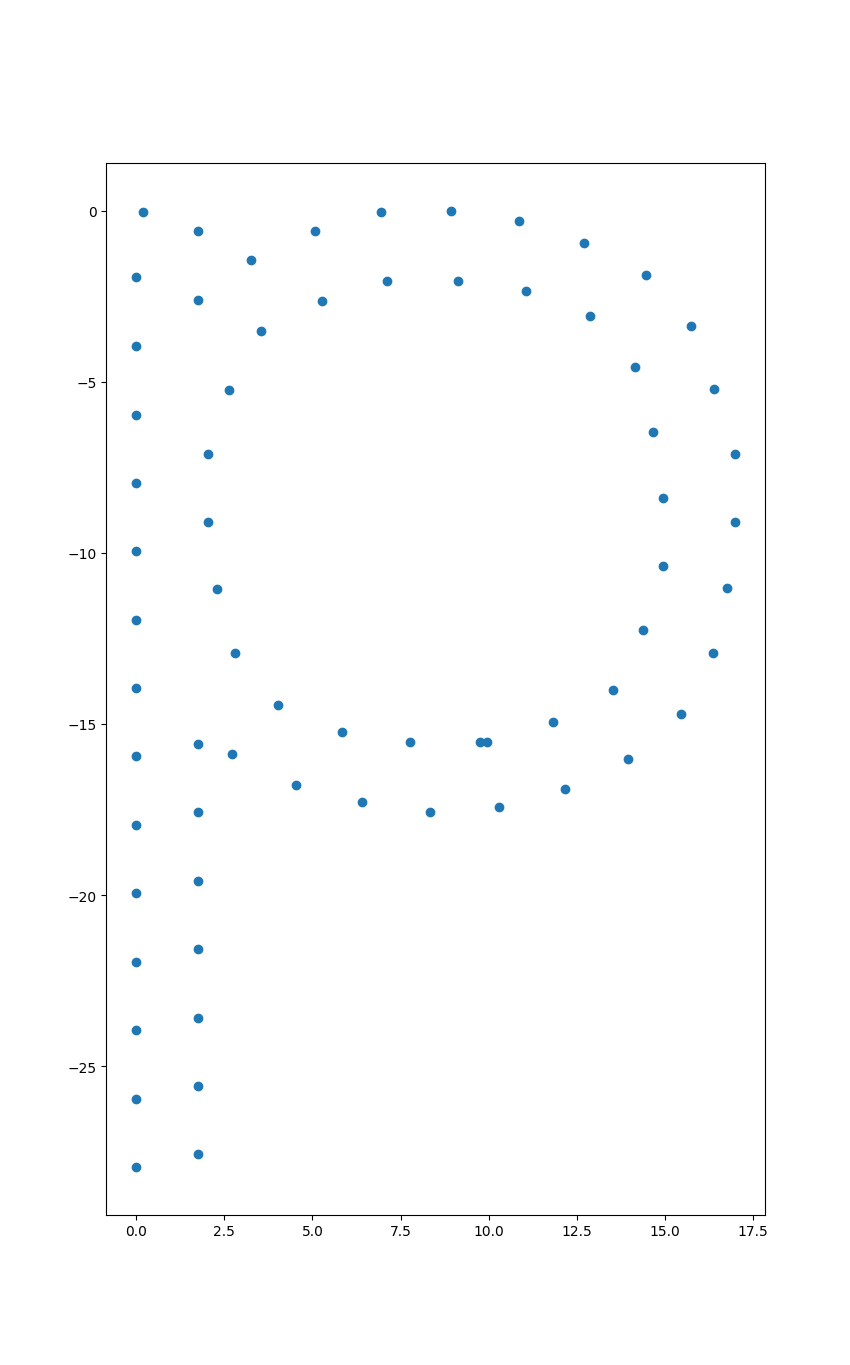

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

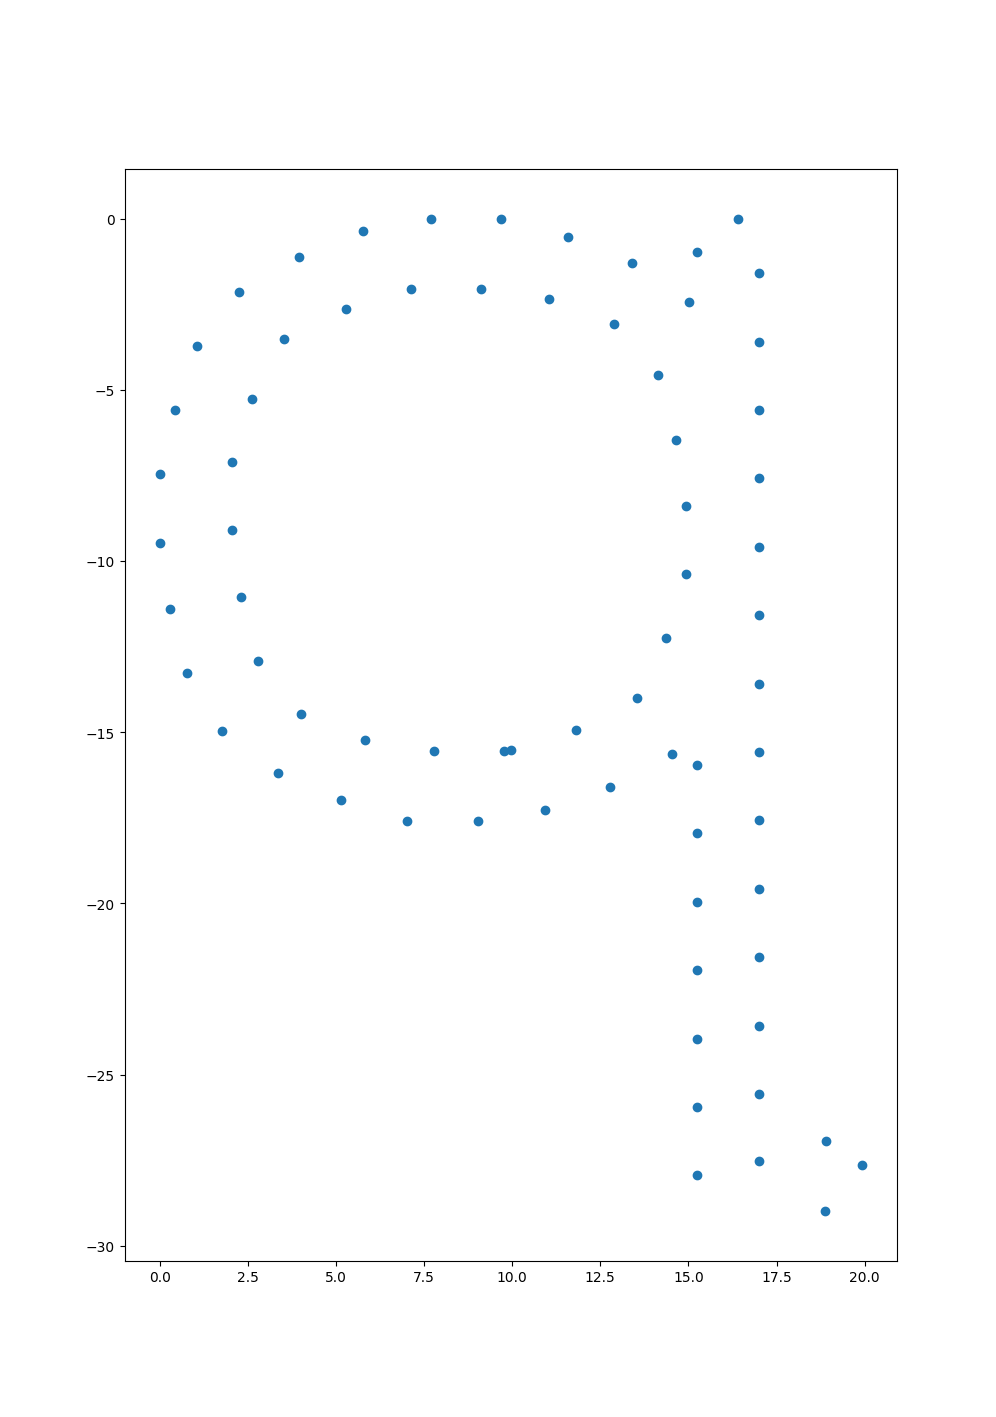

Button(description='next stroke', style=ButtonStyle())

Button(description='next letter', style=ButtonStyle())

Button(description='exit', style=ButtonStyle())

pressed: (4.468763863852008, -9.628964994735082)



In [8]:
out_arr = []
labeler = Labeler(all_letters, letter_scales, out_arr)
labeler.label_letter()

In [9]:
for i, letter in enumerate(out_arr):
    print("letter:", files[i])
    for stroke in letter:
        print("\tstroke:")
        stroke_str = ""
        for point in stroke:
            stroke_str += str(point)
        print("\t\t" + stroke_str)

In [10]:
with open('trace_points', 'w') as f:
    f.write(str(out_arr))